In [15]:
pip install seaborn scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [17]:
df = pd.read_csv("../data/Online_Retail.csv", encoding='windows-1254')

In [18]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
400835,571404,22161,HEART DECORATION RUSTIC HANGING,24,10/17/11 12:04,0.19,17520.0,United Kingdom
67073,541827,21985,PACK OF 12 HEARTS DESIGN TISSUES,20,1/21/11 17:05,0.83,NaN,United Kingdom
278513,561214,21314,SMALL GLASS HEART TRINKET POT,2,7/25/11 17:00,4.13,NaN,United Kingdom
57327,541202,84050,PINK HEART SHAPE EGG FRYING PAN,6,1/14/11 12:09,1.65,17581.0,United Kingdom
465700,576251,22488,NATURAL SLATE RECTANGLE CHALKBOARD,6,11/14/11 13:51,1.65,16207.0,United Kingdom
278408,561214,22822,CREAM WALL PLANTER HEART SHAPED,1,7/25/11 17:00,12.46,NaN,United Kingdom
261282,559821,79302M,"ART LIGHTS,FUNK MONKEY",1,7/12/11 17:09,2.95,16365.0,United Kingdom
250667,559040,84796a,PINK HAWAIIAN PICNIC HAMPER FOR 2,1,7/5/11 15:33,8.29,NaN,United Kingdom
300484,563199,23012,GLASS APOTHECARY BOTTLE PERFUME,2,8/14/11 10:38,3.95,16326.0,United Kingdom
389753,570488,22356,CHARLOTTE BAG PINK POLKADOT,9,10/10/11 17:12,1.63,14096.0,United Kingdom


In [19]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [20]:
df.dropna(inplace=True)

In [21]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [23]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [24]:
df["CustomerID"] = df["CustomerID"].astype(int).astype(str)

In [25]:
def detect_outlier(data):
 """
 helper to detect outliers
 """
 outliers = []
 threshold = 3
 mean = np.mean(data)
 std = np.std(data)
 for y in data:
  z_score= (y - mean)/std
  if np.abs(z_score) > threshold:
   outliers.append(y)
 return outliers

num_cols = ["Quantity", "UnitPrice"]

for item in num_cols:
 if(item != 'CustomerID'):
  mean = np.mean(df[f'{item}'])
  print(f'Outliers {item} : {mean}') 
  outliers = detect_outlier(df[f'{item}'])
  df[f'{item}'].replace(outliers, mean, inplace=True)
  print(outliers)

Outliers Quantity : 12.06130339774205


/var/folders/xp/09_m9yj956x3kbv7qgpqgd6r0000gn/T/ipykernel_26423/2259886488.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[f'{item}'].replace(outliers, mean, inplace=True)


[-9360, 1824, 2880, 1400, 1440, 972, 972, 1008, 1008, 1000, 1488, 1394, 1728, 2400, 960, 1296, 860, 1010, 1356, 1284, 1930, 2000, 3114, 1300, 74215, -74215, 1440, 900, 2592, 800, 1200, 864, 1296, 1296, 1296, 2400, 1056, 1500, 2400, 3906, 1152, 1200, 1152, 864, 864, 768, 900, 800, 1200, 1296, 2160, 1000, 1440, 864, 1200, 1152, 864, 1152, 864, 1200, 1056, 1728, -1300, -1930, -2000, -3114, 1930, 1300, 2000, 3114, 960, 960, 960, 960, 1008, 1200, 1200, 1152, 2000, -960, 1350, 1200, -1350, 864, 2700, 906, 888, 888, 960, 4300, 1152, 1600, 1200, 1515, -1515, 864, 828, 768, 768, 1200, 864, 1440, 3186, 900, 960, 1440, 1440, 1440, 1000, 1008, 1900, 2880, 968, 824, -828, 1200, 2000, 1000, 1440, 1152, 840, 960, 1000, 864, 1788, 1878, 1944, 1944, 1428, 852, 1412, -756, 1200, 1000, 1200, 960, 1540, -1200, 1000, 1296, 840, 1296, -840, -1296, -1296, 1296, 840, 1728, 1200, 960, 960, 2400, 4800, 912, 1992, 3000, 864, 832, 992, 1020, 2100, 1200, 1200, 1000, 960, 864, 1000, 1600, 800, 800, 12540, 760, 774,

In [26]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Diff'] = max(df['InvoiceDate']) - df['InvoiceDate']
recency = df.groupby('CustomerID')['Diff'].min()
recency = recency.dt.days
recency = recency.reset_index()

/var/folders/xp/09_m9yj956x3kbv7qgpqgd6r0000gn/T/ipykernel_26423/2302467272.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [27]:
recency

,CustomerID,Diff
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309
...,...,...
4367,18280,277
4368,18281,180
4369,18282,7
4370,18283,3


In [28]:
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency

,CustomerID,InvoiceNo
0,12346,2
1,12347,182
2,12348,31
3,12349,73
4,12350,17
...,...,...
4367,18280,10
4368,18281,7
4369,18282,13
4370,18283,756


In [29]:
df['Amount'] = df['Quantity'] * df['UnitPrice']
monetary = df.groupby('CustomerID')['Amount'].sum()
monetary = monetary.reset_index()
monetary

,CustomerID,Amount
0,12346,25.087511
1,12347,4310.000000
2,12348,1797.240000
3,12349,1461.010471
4,12350,334.400000
...,...,...
4367,18280,180.600000
4368,18281,80.820000
4369,18282,176.600000
4370,18283,2094.880000


In [30]:
rfm = pd.merge(recency, frequency, on='CustomerID')
rfm = pd.merge(rfm, monetary, on='CustomerID')
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346,325,2,25.087511
1,12347,1,182,4310.000000
2,12348,74,31,1797.240000
3,12349,18,73,1461.010471
4,12350,309,17,334.400000
...,...,...,...,...
4367,18280,277,10,180.600000
4368,18281,180,7,80.820000
4369,18282,7,13,176.600000
4370,18283,3,756,2094.880000


In [31]:
rfm_scaled = rfm[['Recency', 'Frequency', 'Monetary']]
rfm_scaled = StandardScaler().fit_transform(rfm_scaled)
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.columns = ['Recency', 'Frequency', 'Monetary']
rfm_scaled

,Recency,Frequency,Monetary
0,2.322023,-0.391720,-0.233555
1,-0.893733,0.382657,0.312245
2,-0.169196,-0.266959,-0.007823
3,-0.725005,-0.086271,-0.050651
4,2.163220,-0.327188,-0.194155
...,...,...,...
4367,1.845615,-0.357303,-0.213746
4368,0.882873,-0.370209,-0.226456
4369,-0.834182,-0.344397,-0.214255
4370,-0.873883,2.852058,0.030089


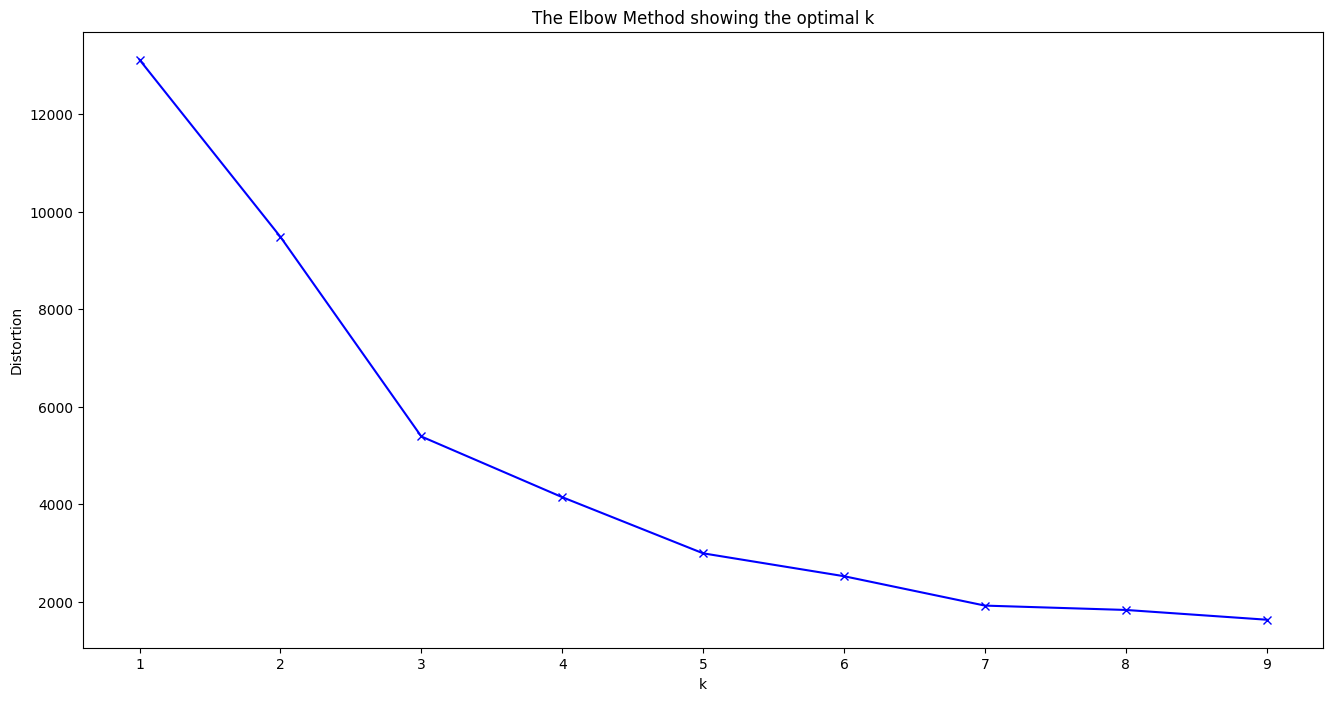

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


models = []
range_n_clusters = range(1, 10)

for num_cluster in range_n_clusters :
    kmeans = KMeans(n_clusters=num_cluster)
    kmeans.fit(rfm_scaled)
    models.append(kmeans)

distortions = [m.inertia_ for m in models]

plt.figure(figsize=(16,8))
plt.plot(range_n_clusters, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [34]:
models[2].predict(rfm_scaled)

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [35]:
rfm["cluster"] = models[2].predict(rfm_scaled)

In [36]:
rfm

,CustomerID,Recency,Frequency,Monetary,cluster
0,12346,325,2,25.087511,0
1,12347,1,182,4310.000000,1
2,12348,74,31,1797.240000,1
3,12349,18,73,1461.010471,1
4,12350,309,17,334.400000,0
...,...,...,...,...,...
4367,18280,277,10,180.600000,0
4368,18281,180,7,80.820000,0
4369,18282,7,13,176.600000,1
4370,18283,3,756,2094.880000,1


In [41]:
print("\n**Estadísticas Descriptivas del RFM por Cluster:**")
rfm.groupby('cluster')[['Recency', 'Frequency', 'Monetary']].agg(['mean', 'median', 'std'])


**Estadísticas Descriptivas del RFM por Cluster:**


Recency                      Frequency                       \
               mean median        std         mean  median          std   
cluster                                                                   
0        246.329680  241.0  67.820874    27.588128    18.0    31.965178   
1         39.289127   28.0  35.477740   104.892190    57.0   148.208067   
2          4.000000    1.5   6.646941  2845.583333  1971.0  2474.249508   

              Monetary                               
                  mean         median           std  
cluster                                              
0           442.701610     292.470000    665.946764  
1          1921.742687     896.000000   3874.533821  
2        113900.122946  101000.317542  78119.963946

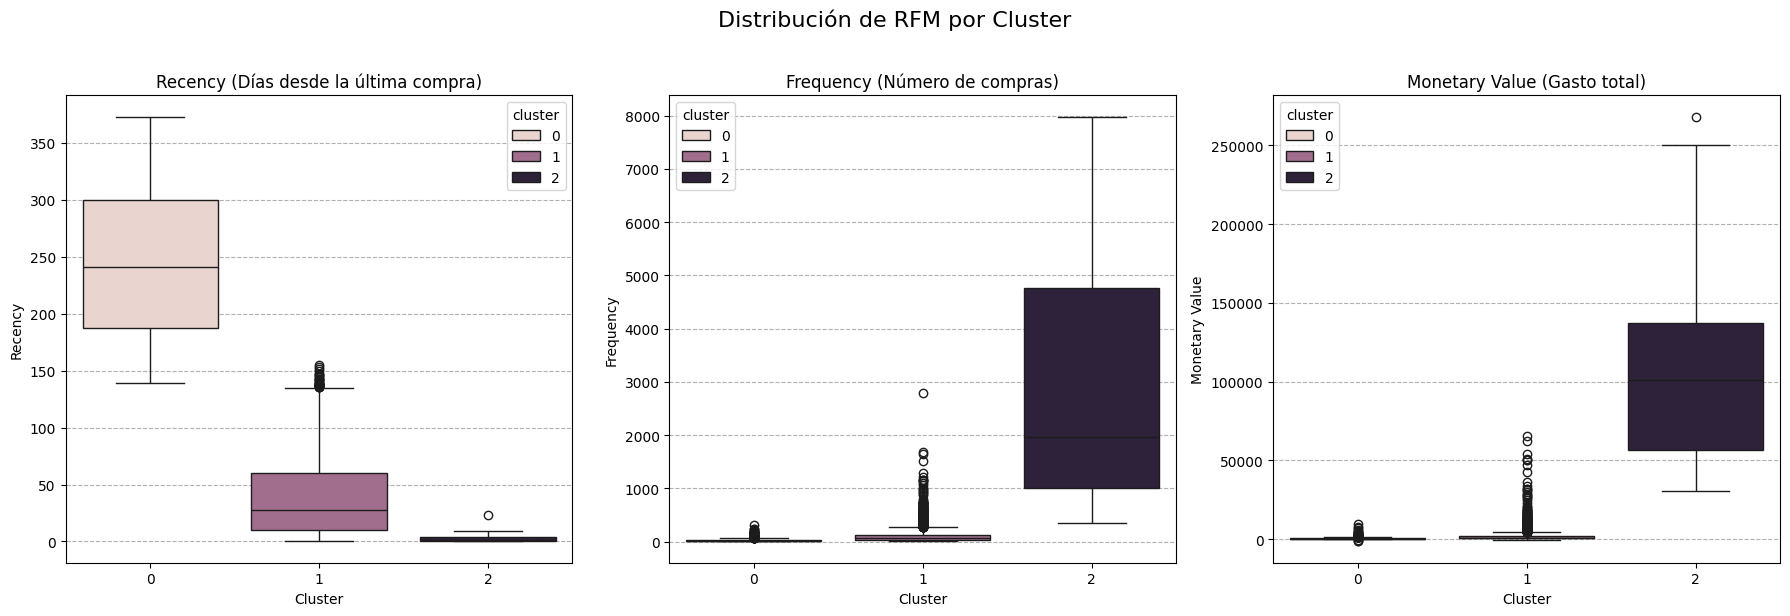

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.suptitle('Distribución de RFM por Cluster', fontsize=16, y=1.02)

# Boxplot para Recency
sns.boxplot(x='cluster', y='Recency', data=rfm, ax=axes[0], hue="cluster")
axes[0].set_title('Recency (Días desde la última compra)')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Recency')
axes[0].grid(axis='y', linestyle='--')

# Boxplot para Frequency
sns.boxplot(x='cluster', y='Frequency', data=rfm, ax=axes[1], hue="cluster")
axes[1].set_title('Frequency (Número de compras)')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y', linestyle='--')

# Boxplot para Monetary Value
sns.boxplot(x='cluster', y='Monetary', data=rfm, ax=axes[2], hue="cluster")
axes[2].set_title('Monetary Value (Gasto total)')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Monetary Value')
axes[2].grid(axis='y', linestyle='--')

# 4. Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

/var/folders/xp/09_m9yj956x3kbv7qgpqgd6r0000gn/T/ipykernel_26423/1778511180.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(rfm['Recency'], rfm['Frequency'],  rfm['Monetary'], label=cluster ,s=100, alpha=0.5, cmap='winter')


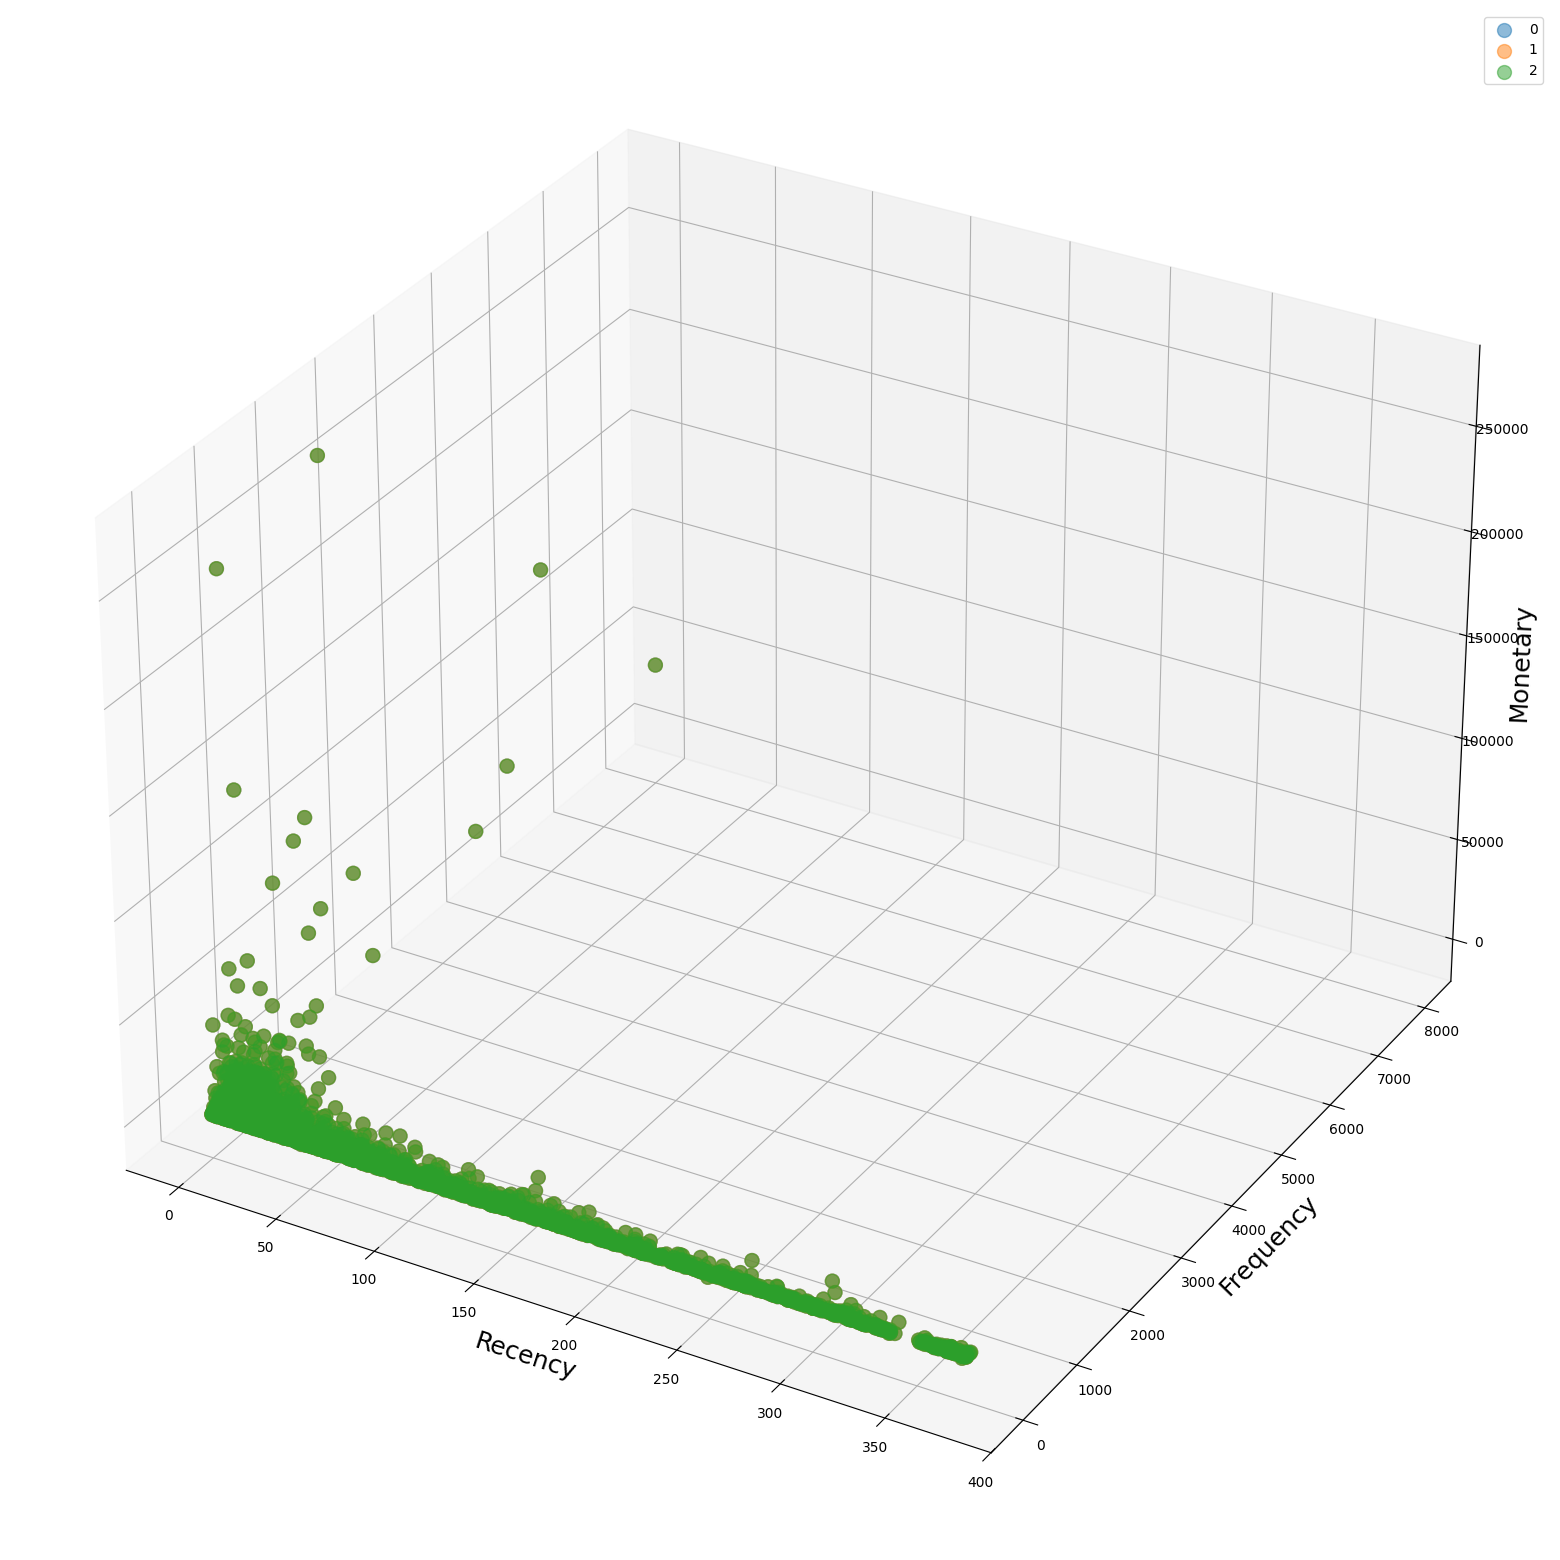

In [43]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')
for cluster in rfm['cluster'].unique() :
  result_cluster = rfm.loc[rfm['cluster'] == cluster]
  ax.scatter(rfm['Recency'], rfm['Frequency'],  rfm['Monetary'], label=cluster ,s=100, alpha=0.5, cmap='winter')

ax.set_xlabel('Recency', fontsize=18)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_zlabel('Monetary', fontsize=18)
ax.legend()
plt.show()

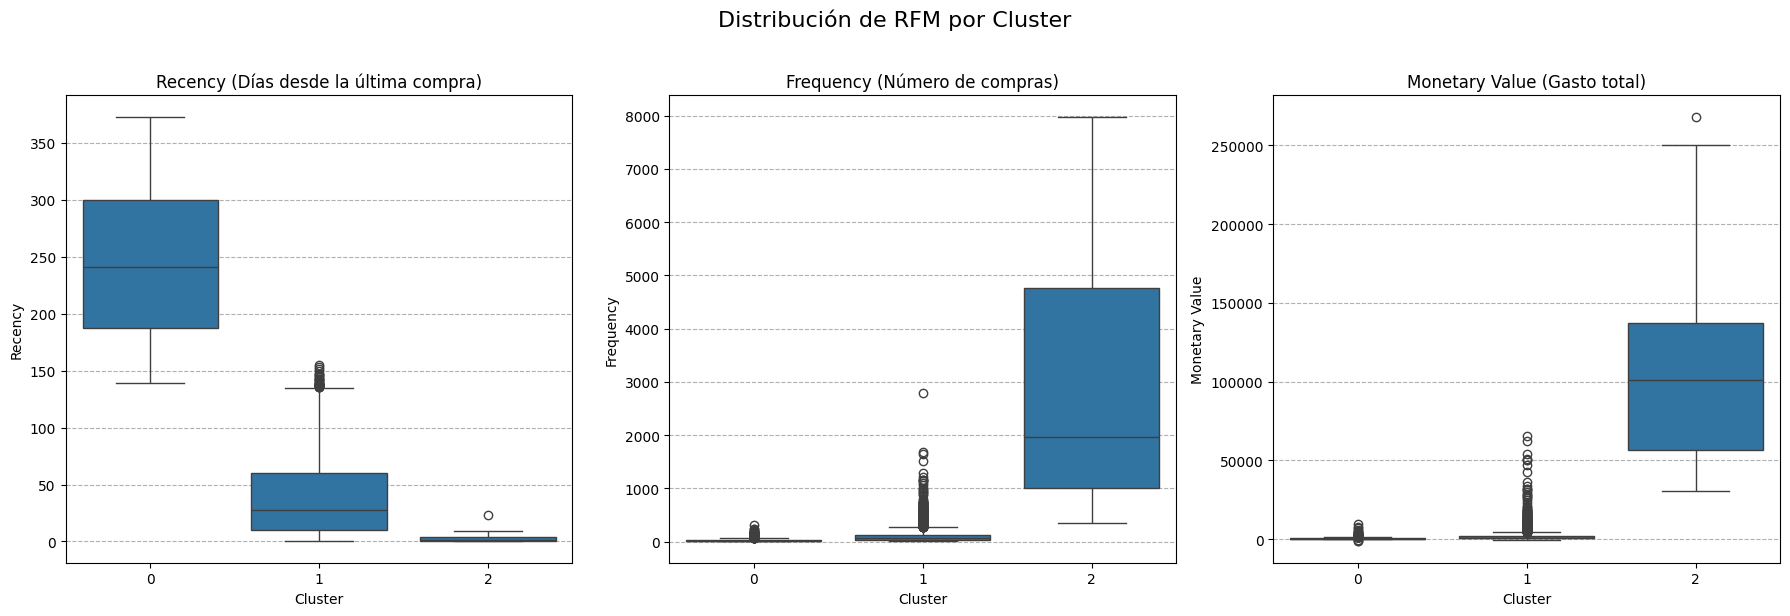


**Estadísticas Descriptivas del RFM por Cluster:**


Recency                      Frequency                       \
               mean median        std         mean  median          std   
cluster                                                                   
0        246.329680  241.0  67.820874    27.588128    18.0    31.965178   
1         39.289127   28.0  35.477740   104.892190    57.0   148.208067   
2          4.000000    1.5   6.646941  2845.583333  1971.0  2474.249508   

              Monetary                               
                  mean         median           std  
cluster                                              
0           442.701610     292.470000    665.946764  
1          1921.742687     896.000000   3874.533821  
2        113900.122946  101000.317542  78119.963946